In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import warnings


In [2]:
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('../Data/Week1_challenge_data_source(CSV).csv',na_values=['?', None])


In [3]:
# Data Understanding

In [4]:
# Top five rows of the data
db.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# size of the data
db.size

8250055

In [6]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [7]:
# data type of the data frame
db.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [8]:
# changing the Data type of Start and End columns to datetime
db[['Start', 'End']] = db[['Start', 'End']].apply(pd.to_datetime)

In [9]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [10]:
# concise summary of the DataFrame
db.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [11]:
# what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")
    
percent_missing(db)

The telecom dataset contains 12.5 % missing values.


In [12]:
# drop columns with more than 30% missing values
df_clean = db.dropna(thresh=db.shape[0]*0.7,how='all', axis=1)
df_clean.shape

(150001, 45)

<AxesSubplot:>

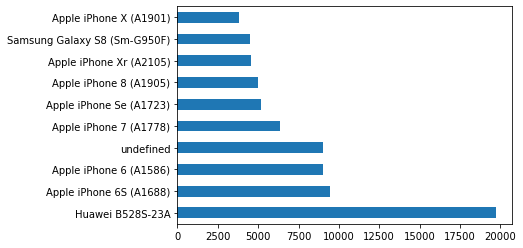

In [13]:
#  identifying the top 10 handsets used by the customers
n = 10
df_clean['Handset Type'].value_counts()[:n]

df_clean['Handset Type'].value_counts()[:n].plot(kind='barh',)

<AxesSubplot:>

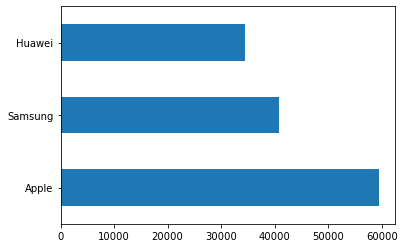

In [14]:
#  identifying the top 3 handset manufacturers
n = 3
df_clean['Handset Manufacturer'].value_counts()[:n]
df_clean['Handset Manufacturer'].value_counts()[:n].plot(kind='barh')

<AxesSubplot:>

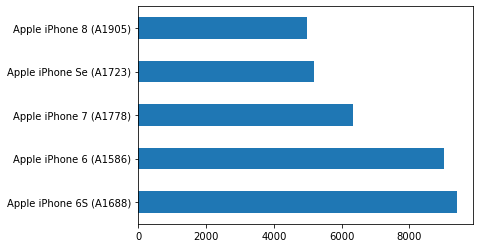

In [15]:
#  identifying the top 5 handsets per top 3 handset manufacturer

def group_by_manufacturer(manufacturer):
    n = 5
    HandSet_manu_grp = df_clean.groupby(['Handset Manufacturer'])
    TOpFive = HandSet_manu_grp.get_group(manufacturer)['Handset Type'].value_counts()[:n]
    return TOpFive
group_by_manufacturer(manufacturer='Apple').plot(kind='barh')

<AxesSubplot:>

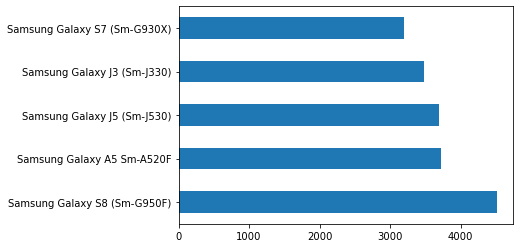

In [16]:
group_by_manufacturer(manufacturer='Samsung').plot(kind='barh')

<AxesSubplot:>

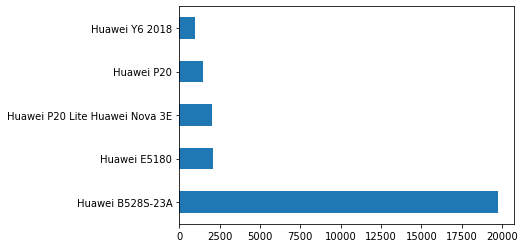

In [17]:
group_by_manufacturer(manufacturer='Huawei').plot(kind='barh',)

In [18]:
        #  Task 1
# User Overview analysis 

In [19]:
# adding two columns and forming a new column
def adding_columns(name,column1,column2):
    df_clean[name] = df_clean[column1] + df_clean[column2]
    return

adding_columns(name='Total_UL_DL',column1='Total UL (Bytes)',column2='Total DL (Bytes)')
adding_columns(name='Social Media_UL_DL',column1='Social Media DL (Bytes)',column2='Social Media UL (Bytes)')
adding_columns(name='Google_UL_DL',column1='Google DL (Bytes)',column2='Google UL (Bytes)')
adding_columns(name='Email_UL_DL',column1='Email DL (Bytes)',column2='Email DL (Bytes)')
adding_columns(name='Youtube_UL_DL',column1='Youtube DL (Bytes)',column2='Youtube DL (Bytes)')
adding_columns(name='Netflix_UL_DL',column1='Netflix DL (Bytes)',column2='Netflix UL (Bytes)')
adding_columns(name='Gaming_UL_DL',column1='Gaming DL (Bytes)',column2='Gaming UL (Bytes)')
adding_columns(name='Other_UL_DL',column1='Other DL (Bytes)',column2='Other UL (Bytes)')

In [20]:
# extracting important variables from the cleaned data
column_name = ['Bearer Id','MSISDN/Number','Dur. (ms)','Total_UL_DL','Social Media_UL_DL','Google_UL_DL','Email_UL_DL','Youtube_UL_DL','Netflix_UL_DL','Gaming_UL_DL','Other_UL_DL']
user = df_clean[column_name]
user.head(2)

,Bearer Id,MSISDN/Number,Dur. (ms),Total_UL_DL,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL
0,1.311448e+19,3.366496e+10,1823652.0,345629377.0,1570185.0,2905912.0,7127084.0,31709222.0,17855187.0,292426453.0,180558843.0
1,1.311448e+19,3.368185e+10,1365104.0,707185356.0,1933278.0,4414096.0,1258092.0,40494790.0,35565545.0,609920783.0,541959383.0


In [21]:
# changing columns that has bytes values in to megabytes of that value

def convert_bytes_to_megabytes(df, bytes_data):
     megabyte = 1*10e+5
     df[bytes_data] = df[bytes_data] / megabyte
    
     return df[bytes_data]
user['Total_UL_DL']= convert_bytes_to_megabytes(user,'Total_UL_DL')
user['Social Media_UL_DL']=convert_bytes_to_megabytes(user,'Social Media_UL_DL')
user['Google_UL_DL']=convert_bytes_to_megabytes(user,'Google_UL_DL')
user['Email_UL_DL']=convert_bytes_to_megabytes(user,'Email_UL_DL')
user['Youtube_UL_DL']=convert_bytes_to_megabytes(user,'Youtube_UL_DL')
user['Netflix_UL_DL']=convert_bytes_to_megabytes(user,'Netflix_UL_DL')
user['Gaming_UL_DL']=convert_bytes_to_megabytes(user,'Gaming_UL_DL')
user['Other_UL_DL']=convert_bytes_to_megabytes(user,'Other_UL_DL')


In [22]:
# Aggregating per user the important columns

user_agg = user.groupby('MSISDN/Number').agg({'Bearer Id':'count','Dur. (ms)':'sum','Total_UL_DL':'sum','Social Media_UL_DL':'sum','Google_UL_DL':'sum','Email_UL_DL':'sum','Youtube_UL_DL':'sum','Netflix_UL_DL':'sum','Gaming_UL_DL':'sum','Other_UL_DL':'sum'}).reset_index()
user_agg['no_of_xdrsessions'] = user_agg['Bearer Id']
user_agg.head(5)


,MSISDN/Number,Bearer Id,Dur. (ms),Total_UL_DL,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL,no_of_xdrsessions
0,3.360100e+10,1,116720.0,878.690574,2.232135,4.389005,1.674800,29.800402,27.180981,812.458661,386.570872,1
1,3.360100e+10,1,181230.0,156.859643,2.660565,5.334863,5.657642,10.648502,11.221763,119.750078,281.710071,1
2,3.360100e+10,1,134969.0,595.966483,3.195623,3.443126,4.873000,4.274544,19.353900,538.827713,501.693672,1
3,3.360101e+10,1,49878.0,422.320698,0.280294,9.678493,4.357236,8.786246,1.942092,391.126127,35.279702,1
4,3.360101e+10,2,37104.0,1457.410944,2.912542,18.499616,4.495616,20.679942,49.201724,1314.797820,804.804484,2


In [23]:
df_clean.isnull().sum()


Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [24]:
skewValue = df_clean.skew(axis=0)
skewValue

Bearer Id                           0.026666
Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity Duration UL (ms)           7.382557
Dur. (ms).1                         3.952609
Nb of sec 

In [220]:
# fill missing with ffill method or bfill for column (Bearer Id) since it is a categorical feature

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]
df_clean['Bearer Id'] = fix_missing_ffill(df_clean, 'Bearer Id')

# fill 'Dur. (ms)' column with mode since the skewness of the column is higher
def fix_missing_mode(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    return df[col]

df_clean['Dur. (ms)'] = fix_missing_mode(df_clean, 'Dur. (ms)')

# fill missing value with mean for column that has no skew number
def fix_missing_mean(df, col):
    df[col] = df[col].fillna(df[col].mean())
    return df[col]
# fill missing value with median for coulumn that has many missing value
def fix_missing_median(df, col):
    df[col] = df[col].fillna(df[col].median())
    return df[col]
df_clean['Total_UL_DL'] = fix_missing_mode(df_clean, 'Total_UL_DL')
df_clean['Social Media_UL_DL'] = fix_missing_mode(df_clean, 'Social Media_UL_DL')
df_clean['Social Media_UL_DL'] = fix_missing_mode(df_clean, 'Social Media_UL_DL')



In [26]:
# which column(s) has missing values
df_clean.isnull().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             0
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [27]:
column_name


['Bearer Id',
 'MSISDN/Number',
 'Dur. (ms)',
 'Total_UL_DL',
 'Social Media_UL_DL',
 'Google_UL_DL',
 'Email_UL_DL',
 'Youtube_UL_DL',
 'Netflix_UL_DL',
 'Gaming_UL_DL',
 'Other_UL_DL']

In [28]:
user['Bearer Id'] = user['Bearer Id'].astype(str)

In [29]:
# non graphical univariate analysis for Bearer Id 
user_grp = user.groupby(['MSISDN/Number']).head(10)
user_grp['Bearer Id'].describe(include=[object]).head(10)



count     148889
unique    134211
top          nan
freq         432
Name: Bearer Id, dtype: object

In [30]:
# non graphical univariate analysis for session duration 
user_grp['Dur. (ms)'].describe().head(10)

count    1.488890e+05
mean     1.048130e+05
std      8.096773e+04
min      7.142000e+03
25%      5.787500e+04
50%      8.639900e+04
75%      1.326200e+05
max      1.859336e+06
Name: Dur. (ms), dtype: float64

In [31]:
# non graphical univariate analysis for session duration 
user_grp['Total_UL_DL'].describe().head(10)

count    148889.000000
mean        495.730213
std         244.378926
min          28.956107
25%         284.465107
50%         496.814198
75%         706.436704
max         955.984776
Name: Total_UL_DL, dtype: float64

In [32]:
# non graphical univariate analysis for session duration 
user_grp['Social Media_UL_DL'].describe().head(10)

count    148889.000000
mean          1.828027
std           1.035616
min           0.001563
25%           0.932100
50%           1.825604
75%           2.727316
max           3.650861
Name: Social Media_UL_DL, dtype: float64

In [33]:
# non graphical univariate analysis for session duration 
user_grp['Google_UL_DL'].describe().head(10)

count    148889.000000
mean          7.807797
std           3.516994
min           0.040330
25%           4.944290
50%           7.814709
75%          10.683125
max          15.528782
Name: Google_UL_DL, dtype: float64

In [34]:
# non graphical univariate analysis for session duration 
user_grp['Email_UL_DL'].describe().head(10)

count    148889.000000
mean          3.583685
std           2.071824
min           0.000028
25%           1.785596
50%           3.587298
75%           5.379428
max           7.172292
Name: Email_UL_DL, dtype: float64

In [35]:
# non graphical univariate analysis for session duration 
user_grp['Youtube_UL_DL'].describe().head(10)

count    148889.000000
mean         23.267653
std          13.422797
min           0.000106
25%          11.664544
50%          23.234196
75%          34.894934
max          46.518196
Name: Youtube_UL_DL, dtype: float64

In [36]:
# non graphical univariate analysis for session duration 
user_grp['Netflix_UL_DL'].describe().head(10)

count    148889.000000
mean         22.628527
std           9.260546
min           0.098432
25%          15.980362
50%          22.634202
75%          29.288247
max          45.198153
Name: Netflix_UL_DL, dtype: float64

In [37]:
# non graphical univariate analysis for session duration 
user_grp['Gaming_UL_DL'].describe().head(10)

count    148889.000000
mean        430.301050
std         244.020261
min           0.306358
25%         218.710220
50%         431.571012
75%         641.386683
max         859.202784
Name: Gaming_UL_DL, dtype: float64

In [38]:
# non graphical univariate analysis for session duration 
user_grp['Other_UL_DL'].describe().head(10)

count    148889.000000
mean        429.421433
std         243.259871
min           0.149045
25%         218.616631
50%         430.091972
75%         639.947703
max         859.520934
Name: Other_UL_DL, dtype: float64

In [39]:
# fixing outliers 
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

In [40]:
user['Dur. (ms)']= fix_outlier(user, column='Dur. (ms)')
user['Total_UL_DL']= fix_outlier(user, column='Total_UL_DL')
user['Social Media_UL_DL']= fix_outlier(user, column='Social Media_UL_DL')
user['Google_UL_DL']= fix_outlier(user, column='Google_UL_DL')
user['Email_UL_DL']= fix_outlier(user, column='Email_UL_DL')
user['Youtube_UL_DL']= fix_outlier(user, column='Youtube_UL_DL')
user['Netflix_UL_DL']= fix_outlier(user, column='Netflix_UL_DL')
user['Gaming_UL_DL']= fix_outlier(user, column='Gaming_UL_DL')
user['Other_UL_DL']= fix_outlier(user, column='Other_UL_DL')



In [41]:
# Graphical univarate analysis

In [42]:
def plot_univariate(df, col1, col2):
    plt.figure(figsize = (12, 8))

    plt.subplot(2, 2, 1)
    plt.hist(df[col1], bins = 20, color = 'orange', edgecolor = 'gray', linewidth = 0.5)
    plt.title(f'Histogram of {col1}', size=14)

    plt.subplot(2, 2, 2)
    plt.boxplot(df[col1])
    plt.title(f'Boxplot of {col1}', size=14)

    plt.subplot(2, 2, 3)
    plt.hist(df[col2], bins=20, color='orange', edgecolor='gray', linewidth=0.5)
    plt.title(f'Histogram of {col2}', size=14)

    plt.subplot(2, 2, 4)
    plt.boxplot(df[col2])
    plt.title(f'Boxplot of {col2}', size=14)

    
    

    plt.show()

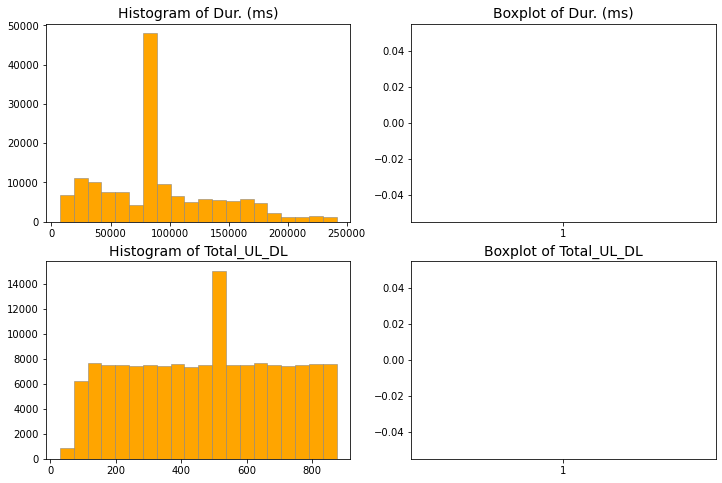

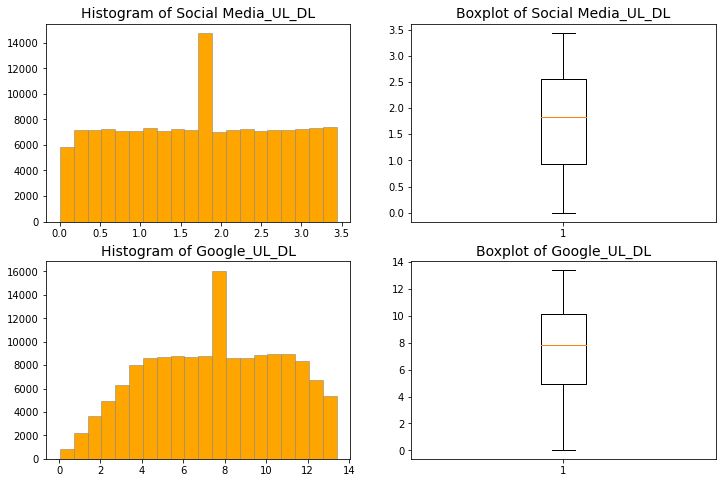

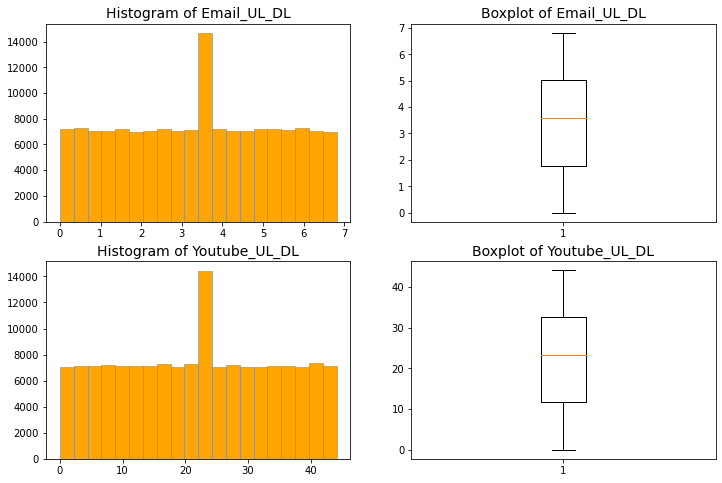

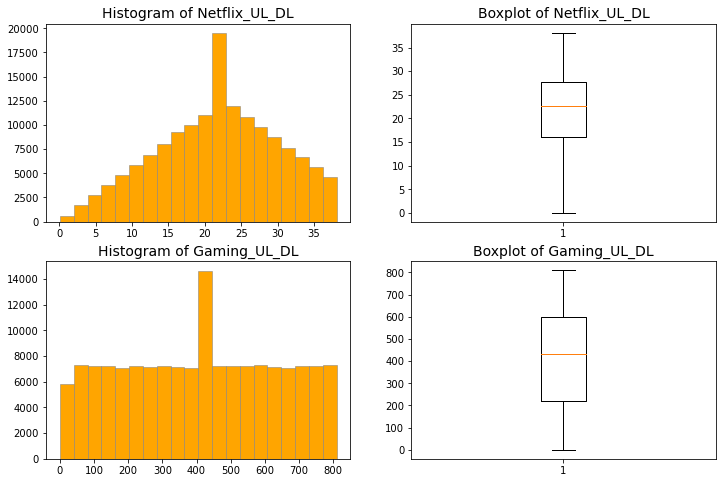

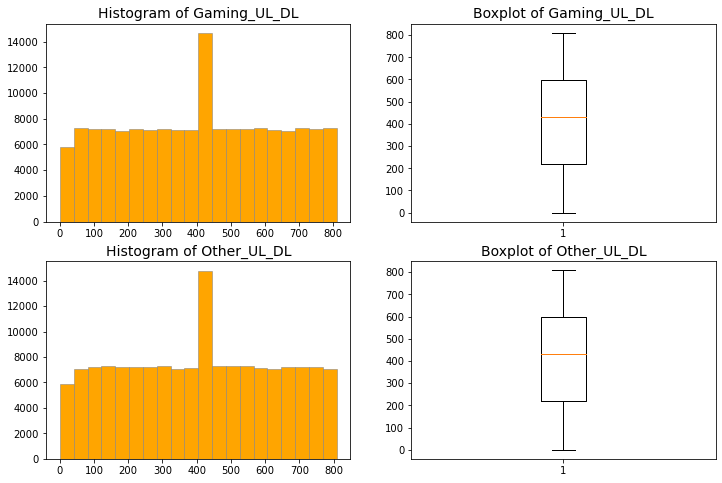

In [43]:
plot_univariate(user, 'Dur. (ms)','Total_UL_DL')
plot_univariate(user, 'Social Media_UL_DL','Google_UL_DL')
plot_univariate(user, 'Email_UL_DL','Youtube_UL_DL')
plot_univariate(user, 'Netflix_UL_DL','Gaming_UL_DL')
plot_univariate(user, 'Gaming_UL_DL','Other_UL_DL')

In [44]:
# bivariate analysis

In [45]:
def plot_scatter(df: pd.DataFrame, x_col: str, y_col:str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

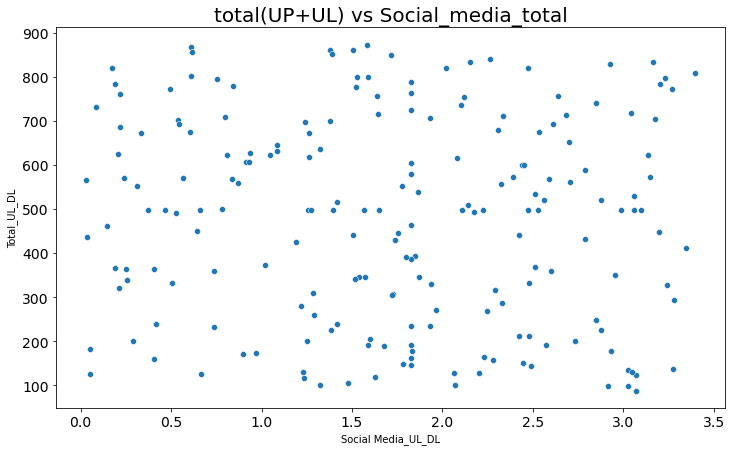

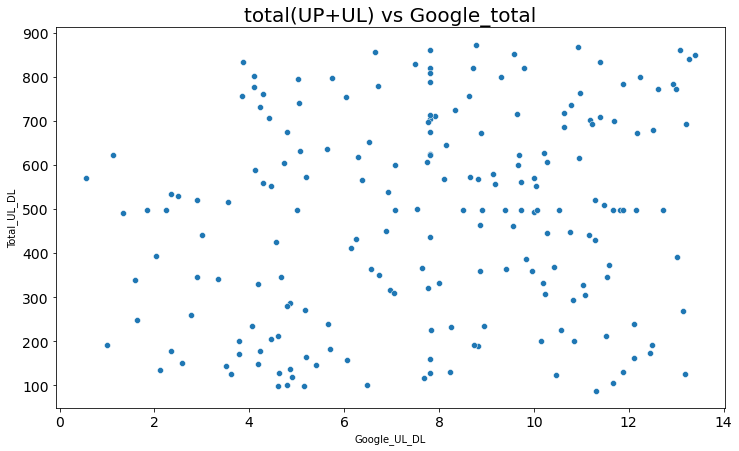

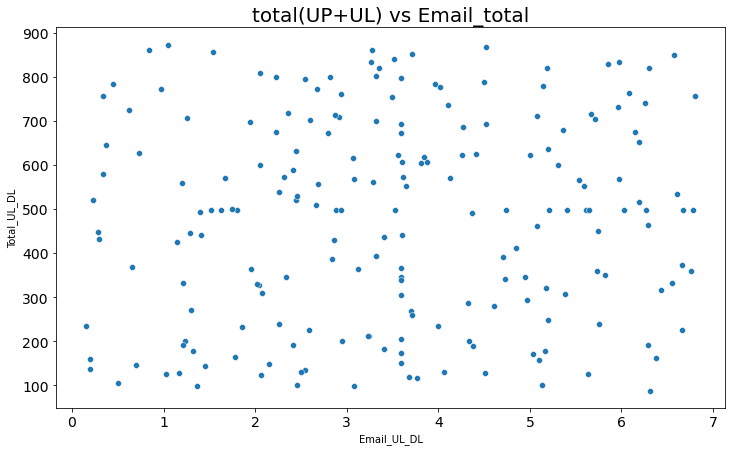

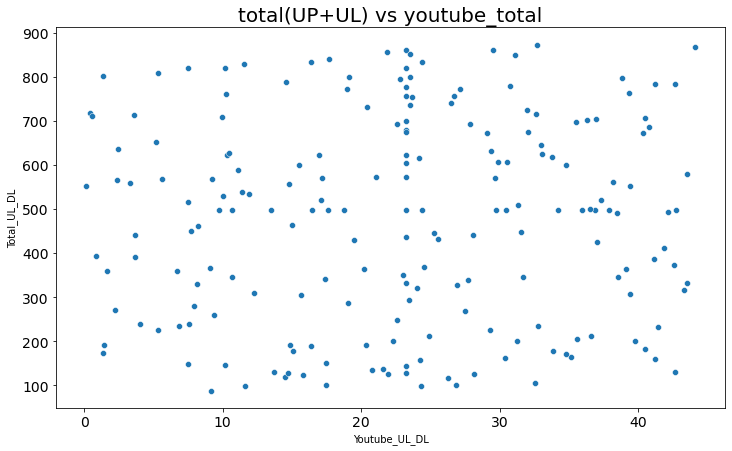

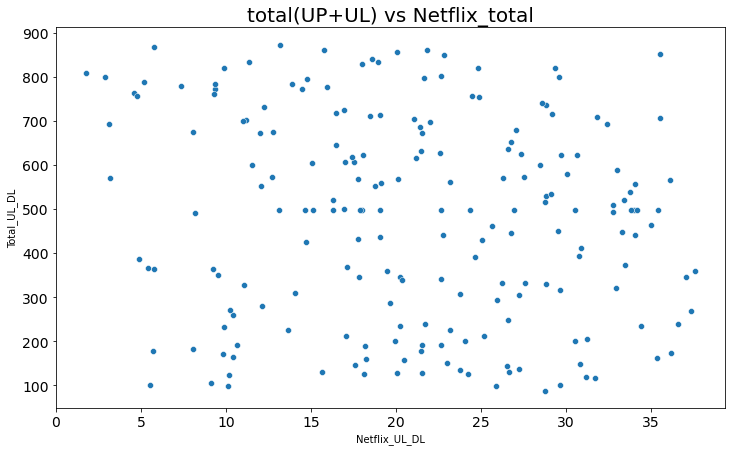

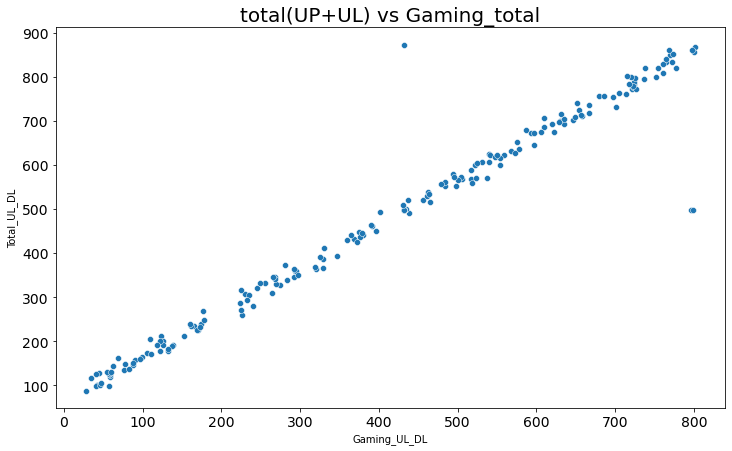

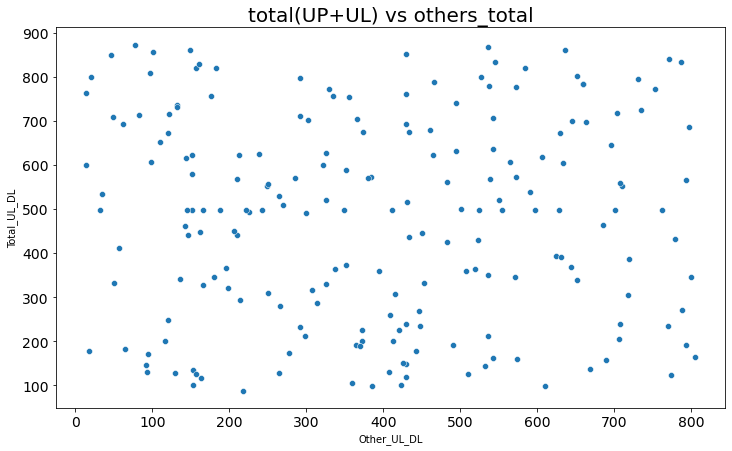

In [46]:
plot_scatter(user.head(200), x_col="Social Media_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Social_media_total")
plot_scatter(user.head(200), x_col="Google_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Google_total")
plot_scatter(user.head(200), x_col="Email_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Email_total")
plot_scatter(user.head(200), x_col="Youtube_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs youtube_total")
plot_scatter(user.head(200), x_col="Netflix_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Netflix_total")
plot_scatter(user.head(200), x_col="Gaming_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Gaming_total")
plot_scatter(user.head(200), x_col="Other_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs others_total")


In [47]:
# dropping Bearer Id column
user.drop('Bearer Id', inplace = True, axis =1)

In [48]:
# variable transformtion
user['decile_rank'] = pd.qcut(user['Dur. (ms)'],q=5,labels=False)
user.tail(10)

,MSISDN/Number,Dur. (ms),Total_UL_DL,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL,decile_rank
149991,3.376215e+10,61661.0,352.656000,0.915749,12.036660,2.158886,14.809638,22.635545,268.231454,263.493166,1.0
149992,3.376127e+10,84940.0,116.264912,1.752716,7.283344,0.120640,23.232038,13.742615,43.581298,429.986492,1.0
149993,3.362611e+10,125622.0,666.947481,2.307959,12.459876,3.607206,36.289406,22.635545,571.286842,179.348636,3.0
149994,3.364566e+10,113545.0,496.861102,0.892867,8.922614,2.620122,23.232038,28.354119,431.614977,792.559807,3.0
149995,3.366865e+10,59587.0,872.761860,0.993175,1.265634,3.587010,13.100998,29.618711,797.160102,336.273648,1.0
149996,3.365069e+10,81230.0,631.804110,1.826471,12.784914,0.115278,32.383334,37.561864,535.806880,16.751926,1.0
149997,3.366345e+10,97970.0,705.783925,2.352181,4.415361,3.908828,27.754468,22.635545,631.628095,714.638145,3.0
149998,3.362189e+10,98249.0,627.698629,1.260239,6.585469,3.051468,23.232038,15.029702,566.933800,132.415585,3.0
149999,3.361962e+10,97910.0,401.522016,0.823109,7.757267,4.456540,17.634212,16.494842,355.066446,429.986492,3.0
150000,NaN,NaN,NaN,1.828250,7.807295,3.583458,23.268145,22.628607,430.333101,429.365344,NaN


In [49]:
# computing total data (DL+Ul) per decile class
user.groupby('decile_rank')['Total_UL_DL'].sum()


decile_rank
0.0    1.424170e+07
1.0    2.623874e+07
2.0    3.064036e+06
3.0    1.345867e+07
4.0    1.434439e+07
Name: Total_UL_DL, dtype: float64

In [50]:
user.head(1)

,MSISDN/Number,Dur. (ms),Total_UL_DL,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL,decile_rank
0,3.366496e+10,86399.0,345.629377,1.570185,2.905912,3.58701,31.709222,17.855187,292.426453,180.558843,1.0


<AxesSubplot:>

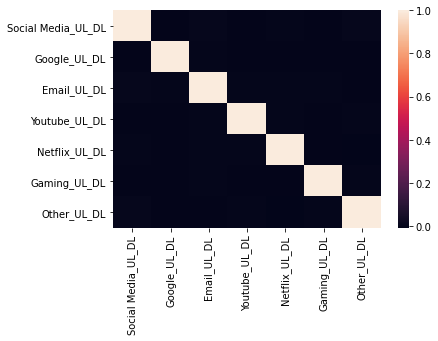

In [51]:
# Correlation Analysis
application = user[['Social Media_UL_DL','Google_UL_DL','Email_UL_DL','Youtube_UL_DL','Netflix_UL_DL','Gaming_UL_DL','Other_UL_DL']]
correlate_column = application.corr()
sns.heatmap(correlate_column)

In [52]:
# Dimensionality Reduction
# standard scaling
from sklearn.preprocessing import StandardScaler
application= StandardScaler().fit_transform(application)
application
# changing numpy array to DataFrame
application = pd. DataFrame(application, columns=['Social Media_UL_DL','Google_UL_DL','Email_UL_DL','Youtube_UL_DL','Netflix_UL_DL','Gaming_UL_DL','Other_UL_DL']) 
application.head(5)

,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL
0,-0.180246,-1.431699,0.090621,0.768065,-0.467616,-0.521663,-1.015832
1,0.198197,-0.960869,-1.123253,1.474877,1.666584,0.882731,0.588900
2,-0.017555,0.854486,1.025317,1.390928,0.242888,-0.797885,0.024753
3,-1.131523,1.348560,-0.278142,1.658423,-0.800525,0.094019,1.565226
4,-0.865436,0.080184,0.239680,0.672290,-0.505622,0.534684,0.689519


In [53]:
# principal component analysis
from sklearn.decomposition import PCA
p_analysis  = PCA()
application_pca = p_analysis.fit_transform(application)
# changing numpy array to DataFrame
application_pca = pd. DataFrame(application_pca, columns=['Social Media_UL_DL','Google_UL_DL','Email_UL_DL','Youtube_UL_DL','Netflix_UL_DL','Gaming_UL_DL','Other_UL_DL']) 
application_pca.head(5)

,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL
0,-0.632444,0.112542,-0.810676,0.001923,1.242217,0.970337,0.805351
1,-0.313845,0.389660,-0.801621,-0.402060,1.450168,-2.267800,0.050427
2,-0.501691,0.162200,-1.509969,0.886248,-1.029528,-0.091266,0.030606
3,0.893353,-1.894910,-1.370757,1.108901,-0.579460,-0.944824,-0.548123
4,0.453380,-0.736455,-0.389183,0.989088,0.379793,-0.218950,-0.460376


In [61]:
    # Task 2
# User Engagement analysis
 
# Function for aggregating columns per customer id (MSISDN) 
def sort_column(df,col1,col2):
     user_agg2 = df[[col1,col2]]
     sorted_data = user_agg2.sort_values(by=col2,ascending=False)
     return sorted_data

In [62]:
# Aggregating number of XDR sessions per customer id (MSISDN) and reporting the top 10 customers per number of XDR sessions 
sorted_no_of_XDR = sort_column(user_agg,col1='MSISDN/Number',col2='no_of_xdrsessions')
sorted_no_of_XDR.head(10)

,MSISDN/Number,no_of_xdrsessions
13526,3.362632e+10,18
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
76363,3.367588e+10,15
92923,3.376054e+10,15
65118,3.366716e+10,13
92577,3.376041e+10,12
1279,3.360452e+10,12
666,3.360313e+10,12


In [63]:
user.head(1)

,MSISDN/Number,Dur. (ms),Total_UL_DL,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL,decile_rank
0,3.366496e+10,86399.0,345.629377,1.570185,2.905912,3.58701,31.709222,17.855187,292.426453,180.558843,1.0


In [64]:
# Aggregating duration of the session per customer id (MSISDN) and reporting the top 10 customers per number of XDR sessions 
sorted_Dur = sort_column(user_agg,col1='MSISDN/Number',col2='Dur. (ms)')
sorted_Dur.head(10)

,MSISDN/Number,Dur. (ms)
13180,3.362578e+10,18553754.0
6437,3.361489e+10,9966898.0
92923,3.376054e+10,9279434.0
13526,3.362632e+10,8791927.0
65118,3.366716e+10,8744914.0
50281,3.366284e+10,6614270.0
57160,3.366469e+10,6288730.0
666,3.360313e+10,6287761.0
66029,3.366746e+10,5649882.0
92577,3.376041e+10,5321667.0


In [65]:
# Aggregating duration of Total_UL_DL per customer id (MSISDN) and reporting the top 10 customers per number of XDR sessions 
sorted_Total_UL_DL = sort_column(user_agg,col1='MSISDN/Number',col2='Total_UL_DL')
sorted_Total_UL_DL.head(10)

,MSISDN/Number,Total_UL_DL
6437,3.361489e+10,8846.226494
92923,3.376054e+10,8514.773963
13180,3.362578e+10,8499.620722
13526,3.362632e+10,7971.167261
76363,3.367588e+10,7891.110608
37052,3.365973e+10,7705.862783
63028,3.366646e+10,7308.500938
92577,3.376041e+10,7132.370514
57241,3.366471e+10,6872.018208
86455,3.369879e+10,6540.899126


In [147]:
#scaling the three columns to distribute the data normally across the column and running a k-means (k=3) to classify customers in three groups of engagement.
from sklearn.cluster import KMeans
def kmeans_cluster (df,columns):
    kmeans= KMeans(n_clusters=3)
    df[columns] = StandardScaler().fit_transform(df[columns])
    cluster = kmeans.fit_predict(df[columns])
    cluster = pd.DataFrame(cluster)
    df['cluster'] = cluster
    return df.head(3)


In [144]:
user_agg2 = user_agg.copy()
columns = ['no_of_xdrsessions','Dur. (ms)','Total_UL_DL']
kmeans_cluster(user_agg,columns)

,MSISDN/Number,Bearer Id,Dur. (ms),Total_UL_DL,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL,no_of_xdrsessions,cluster
0,3.360100e+10,1,-0.158014,0.382297,2.232135,4.389005,1.674800,29.800402,27.180981,812.458661,386.570872,-0.48129,0
1,3.360100e+10,1,0.188148,-1.087666,2.660565,5.334863,5.657642,10.648502,11.221763,119.750078,281.710071,-0.48129,0
2,3.360100e+10,1,-0.060090,-0.193453,3.195623,3.443126,4.873000,4.274544,19.353900,538.827713,501.693672,-0.48129,0


In [152]:
# Compute the minimum, maximum, average & total
user_agg['cluster'] = user_agg2['cluster']
user_cluster=user_agg.groupby('cluster').agg({'no_of_xdrsessions':{np.min,np.mean,np.sum,np.max},'Dur. (ms)':{np.min,np.mean,np.sum,np.max},'Total_UL_DL':{np.min,np.mean,np.sum,np.max}})
user_cluster.columns=['No_of_xDRsessions_min','No_of_xDRsessions_Avg','No_of_xDRsessions_Tot','No_of_xDRsessions_Max','Dur. (ms)_Min','Dur. (ms)_Avg','Dur. (ms)_Tot','Dur. (ms)_Max','Total_UL_DL_Min','Total_UL_DL_Avg','Total_UL_DL_Tot','Total_UL_DL_Max']

In [153]:
user_cluster.head(5)

,No_of_xDRsessions_min,No_of_xDRsessions_Avg,No_of_xDRsessions_Tot,No_of_xDRsessions_Max,Dur. (ms)_Min,Dur. (ms)_Avg,Dur. (ms)_Tot,Dur. (ms)_Max,Total_UL_DL_Min,Total_UL_DL_Avg,Total_UL_DL_Tot,Total_UL_DL_Max
cluster,,,,,,,,,,,,
0,0.753493,-1.716073,-0.453643,-36206.633865,3.923731,-0.746012,-0.231294,-18460.268214,1.499100,-1.339392,-0.398965,-31842.557098
1,20.510022,-0.481290,3.715938,13303.057088,98.775512,-0.426991,2.736688,9797.342672,16.607687,-0.652762,3.248922,11631.141081
2,3.223059,-0.481290,0.976157,22903.576777,7.162071,-0.686487,0.369216,8662.925541,3.710064,-1.165809,0.861417,20211.416017


In [ ]:
# Aggregate user total traffic per application and derive the top 10 most engaged users per application

def sort_column(df,col1,col2):
     user_agg2 = df[[col1,col2]]
     sorted_data = user_agg2.sort_values(by=col2,ascending=False)
     return sorted_data
sort_column(user_agg,col1='MSISDN/Number'col2='Youtube_UL_DL')

In [161]:
# Top 10 for email
Top_Ten = sort_column(user_agg,col1='MSISDN/Number',col2='Email_UL_DL')
Top_Ten.head(10)

,MSISDN/Number,Email_UL_DL
6437,3.361489e+10,67.214422
13526,3.362632e+10,66.809570
13180,3.362578e+10,63.790824
106137,3.378632e+10,61.753816
37052,3.365973e+10,59.815294
92923,3.376054e+10,52.875790
60087,3.366546e+10,51.885742
76363,3.367588e+10,48.569446
86455,3.369879e+10,48.331198
65118,3.366716e+10,46.553504


In [162]:
# Top 10 for Netflix
Top_Ten = sort_column(user_agg,col1='MSISDN/Number',col2='Netflix_UL_DL')
Top_Ten.head(10)

,MSISDN/Number,Netflix_UL_DL
37052,3.365973e+10,399.519079
6437,3.361489e+10,361.401046
13180,3.362578e+10,356.980607
92923,3.376054e+10,334.643269
13526,3.362632e+10,328.725740
92577,3.376041e+10,318.347546
65118,3.366716e+10,313.939488
76363,3.367588e+10,309.093159
106137,3.378632e+10,305.939790
94654,3.376127e+10,292.091341


In [164]:
# Top 10 for Google
Top_Ten = sort_column(user_agg,col1='MSISDN/Number',col2='Google_UL_DL')
Top_Ten.head(10)

,MSISDN/Number,Google_UL_DL
13526,3.362632e+10,152.191852
13180,3.362578e+10,142.307915
6437,3.361489e+10,127.973787
92923,3.376054e+10,123.223099
37052,3.365973e+10,116.516345
106137,3.378632e+10,110.254484
76363,3.367588e+10,109.860502
65118,3.366716e+10,105.032696
94654,3.376127e+10,97.089988
86313,3.369876e+10,91.935151


In [165]:
# Top 10 for social
Top_Ten = sort_column(user_agg,col1='MSISDN/Number',col2='Social Media_UL_DL')
Top_Ten.head(10)

,MSISDN/Number,Social Media_UL_DL
13526,3.362632e+10,43.374779
92923,3.376054e+10,39.783189
37052,3.365973e+10,35.412358
6437,3.361489e+10,28.294544
13180,3.362578e+10,27.135500
65118,3.366716e+10,24.247850
106137,3.378632e+10,23.974919
70960,3.366907e+10,23.800834
666,3.360313e+10,23.077825
31331,3.365849e+10,23.000066


In [166]:
# Top 10 for Gaming
Top_Ten=sort_column(user_agg,col1='MSISDN/Number',col2='Gaming_UL_DL')
Top_Ten.head(10)

,MSISDN/Number,Gaming_UL_DL
6437,3.361489e+10,7749.432234
92923,3.376054e+10,7461.045228
13180,3.362578e+10,7326.673487
76363,3.367588e+10,6970.567597
13526,3.362632e+10,6887.572116
37052,3.365973e+10,6725.559211
63028,3.366646e+10,6646.303338
92577,3.376041e+10,6268.619592
57241,3.366471e+10,6103.856008
86455,3.369879e+10,5753.743069


In [167]:
# Top 10 for other
Top_Ten = sort_column(user_agg,col1='MSISDN/Number',col2='Other_UL_DL')
Top_Ten.head(10)

,MSISDN/Number,Other_UL_DL
13526,3.362632e+10,8167.877776
6437,3.361489e+10,7639.263572
76363,3.367588e+10,6798.515150
13180,3.362578e+10,6354.583086
666,3.360313e+10,6326.670874
37052,3.365973e+10,6317.415487
13936,3.362695e+10,5305.447882
13994,3.362708e+10,5117.790890
94654,3.376127e+10,5077.779438
30715,3.365836e+10,5013.650844


In [171]:
# Ploting the top 3 most used applications using appropriate charts.  
application_columns = ['Social Media_UL_DL', 'Google_UL_DL', 'Email_UL_DL', 'Youtube_UL_DL',
       'Netflix_UL_DL', 'Gaming_UL_DL', 'Other_UL_DL']
applications = user_agg[application_columns].sum().sort_values(ascending=False).nlargest(3)

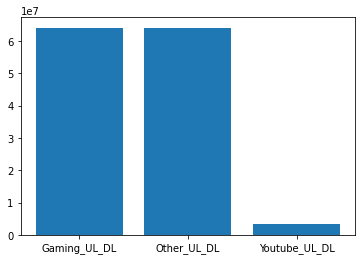

In [173]:
# Ploting using bar charts
plt.bar(applications.index,applications)
plt.show()

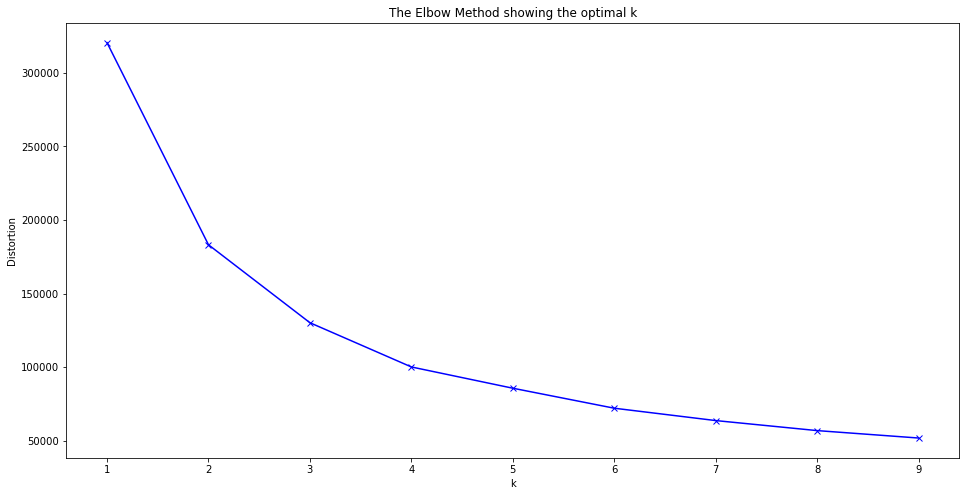

In [177]:
# grouping users in k engagement clusters based on the engagement metrics: 
metrics = user_agg[['no_of_xdrsessions', 'Dur. (ms)', 'Total_UL_DL']]
column =  ['no_of_xdrsessions', 'Dur. (ms)', 'Total_UL_DL']
metrics[column] = StandardScaler().fit_transform(metrics[column])
# running K-Means for a range of clusters using a for loop and collecting the distortions into a list.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(metrics[column])
    distortions.append(kmeanModel.inertia_)
# Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [178]:
# We can see from the figure that the “elbow” is the number 4 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 4.
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(metrics[column])

KMeans(n_clusters=4)

In [235]:
# Task 3 - Experience Analytics
experience_parameters = db[['MSISDN/Number','Avg RTT DL (ms)','Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','Handset Type']]

In [237]:
def average_columns(df,col1,col2,name):
   name =(df[col1]+df[col2])/2
   return name

In [238]:
experience_parameters['Avg RTT'] =average_columns(experience_parameters,col1='Avg RTT DL (ms)',col2='Avg RTT UL (ms)',name='Avg RTT')

In [239]:
experience_parameters['Avg TCP'] = average_columns(experience_parameters,col1='TCP DL Retrans. Vol (Bytes)',col2='TCP UL Retrans. Vol (Bytes)',name='Avg TCP')

In [240]:
experience_parameters['Avg throughput'] = average_columns(experience_parameters,col1='Avg Bearer TP DL (kbps)',col2='Avg Bearer TP DL (kbps)',name='Avg throughput')

In [241]:
# fill missing value with median for AVG RTT, AVG TCP and AVG thtoughput since it  has many missing value
fix_missing_median(experience_parameters,col='Avg RTT')
fix_missing_median(experience_parameters,col='Avg TCP')
fix_missing_median(experience_parameters,col='Avg throughput')
fix_missing_mode(experience_parameters,col='Handset Type')


0          Samsung Galaxy A5 Sm-A520F
1         Samsung Galaxy J5 (Sm-J530)
2            Samsung Galaxy A8 (2018)
3                           undefined
4                    Samsung Sm-G390F
                     ...             
149996    Apple iPhone 8 Plus (A1897)
149997        Apple iPhone Se (A1723)
149998        Apple iPhone Xs (A2097)
149999                 Huawei Fig-Lx1
150000               Huawei B528S-23A
Name: Handset Type, Length: 150001, dtype: object

In [242]:
experience_parameters.isnull().sum()

MSISDN/Number                   1066
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
Handset Type                       0
Avg RTT                            0
Avg TCP                            0
Avg throughput                     0
dtype: int64

In [243]:
experience_parameters.head(1)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,Avg RTT,Avg TCP,Avg throughput
0,3.366496e+10,42.0,5.0,NaN,NaN,23.0,44.0,Samsung Galaxy A5 Sm-A520F,23.5,593484.5,23.0


In [244]:
 # Aggregateing per customer the experience_parameters columns
 experience_agg = experience_parameters.groupby(['MSISDN/Number']).agg({'Handset Type':'count','Avg RTT':'sum','Avg TCP':'sum','Avg throughput':'sum'})

In [246]:
experience_agg.head(5)

,Handset Type,Avg RTT,Avg TCP,Avg throughput
MSISDN/Number,,,,
3.360100e+10,1,23.0,593484.5,37.0
3.360100e+10,1,15.5,593484.5,48.0
3.360100e+10,1,27.0,593484.5,48.0
3.360101e+10,1,42.0,593484.5,204.0
3.360101e+10,2,59.5,5278900.5,40395.0
